## EDA NOTEBOOK
#### Basic EDA Notebook to convert json data to csv then apply tranpose on it then convert nested jsons to columns and then merge

In [1]:
#warning hiding
import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
json_df = pd.read_json("/kaggle/input/epl-dataset-20222023-update-every-week/epl_2022_2023_23_01_2023.json", encoding='latin1')


In [4]:
json_df

,75091,75096,75098,75099,75093,75082,75088,75087,75089,75084,...,75115,75118,75111,75117,75112,75116,75119,75120,74978,74973
event,"[Full-time Match ends, Arsenal 0, Newcastle Un...","[Full-time Match ends, Everton 1, Brighton and...","[Full-time Match ends, Leicester City 0, Fulha...","[Full-time Match ends, Manchester United 3, Bo...","[Full-time Match ends, Brentford 3, Liverpool ...","[Full-time Match ends, Brighton and Hove Albio...","[Full-time Match ends, Tottenham Hotspur 0, As...","[Full-time Match ends, Nottingham Forest 1, Ch...","[Full-time Match ends, West Ham United 0, Bren...","[Full-time Match ends, Liverpool 2, Leicester ...",...,"[Full-time Match ends, Leeds United 0, Brentfo...","[Full-time Match ends, Manchester City 3, Wolv...","[Full-time Match ends, Arsenal 3, Manchester U...","[Full-time Match ends, Liverpool 0, Chelsea 0....","[Full-time Match ends, Bournemouth 1, Nottingh...","[Full-time Match ends, Leicester City 2, Brigh...","[Full-time Match ends, Southampton 0, Aston Vi...","[Full-time Match ends, West Ham United 2, Ever...","[Full-time Match ends, Manchester City 4, Tott...","[Full-time Match ends, Crystal Palace 1, Manch..."
matchweek,Matchweek 19,Matchweek 19,Matchweek 19,Matchweek 19,Matchweek 19,Matchweek 18,Matchweek 18,Matchweek 18,Matchweek 18,Matchweek 18,...,Matchweek 21,Matchweek 21,Matchweek 21,Matchweek 21,Matchweek 21,Matchweek 21,Matchweek 21,Matchweek 21,Matchweek 20,Matchweek 20
team1_name,Arsenal,Everton,Leicester City,Manchester United,Brentford,Brighton and Hove Albion,Tottenham Hotspur,Nottingham Forest,West Ham United,Liverpool,...,Leeds United,Manchester City,Arsenal,Liverpool,Bournemouth,Leicester City,Southampton,West Ham United,Manchester City,Crystal Palace
team1_startings,"[Aaron Ramsdale, Ben White, Gabriel Magalhães,...","[Jordan Pickford, James Tarkowski, Nathan Patt...","[Danny Ward, Wout Faes, Daniel Amartey, Timoth...","[David de Gea, Victor Lindelöf, Harry Maguire,...","[David Raya, Ethan Pinnock, Zanka, Ben Mee, Ri...","[Robert Sánchez, Tariq Lamptey, Lewis Dunk, Le...","[Hugo Lloris, Cristian Romero, Ben Davies, Clé...","[Dean Henderson, Joe Worrall, Serge Aurier, Wi...","[Lukasz Fabianski, Aaron Cresswell, Craig Daws...","[Alisson, Virgil van Dijk, Andrew Robertson, J...",...,"[Illan Meslier, Luke Ayling, Robin Koch, Pasca...","[Ederson, John Stones, Aymeric Laporte, Manuel...","[Aaron Ramsdale, Ben White, Gabriel Magalhães,...","[Alisson, Joe Gomez, Ibrahima Konaté, James Mi...","[Neto, Jack Stephens, Lloyd Kelly, Adam Smith,...","[Danny Ward, Wout Faes, Daniel Amartey, Timoth...","[Gavin Bazunu, Kyle Walker-Peters, Lyanco, Duj...","[Lukasz Fabianski, Kurt Zouma, Angelo Ogbonna,...","[Ederson, John Stones, Nathan Aké, Manuel Akan...","[Vicente Guaita, Tyrick Mitchell, Marc Guéhi, ..."
team1_subs,"[Matt Turner, Kieran Tierney, Rob Holding, Tak...","[Asmir Begovic, Yerry Mina, Ben Godfrey, Séamu...","[Daniel Iversen, Çaglar Söyüncü, Jannik Vester...","[Tom Heaton, Lisandro Martínez, Tyrell Malacia...","[Thomas Strakosha, Mads Bech Sørensen, Tristan...","[Jason Steele, Jan Paul van Hecke, Joël Veltma...","[Fraser Forster, Davinson Sánchez, Emerson Roy...","[Wayne Hennessey, Steve Cook, Neco Williams, H...","[Alphonse Aréola, Ben Johnson, Thilo Kehrer, N...","[Adrián, Joe Gomez, Ibrahima Konaté, Konstanti...",...,"[Joel Robles, Junior Firpo, Diego Llorente, Ra...","[Stefan Ortega, Kyle Walker, Rúben Dias, Natha...","[Matt Turner, Kieran Tierney, Rob Holding, Tak...","[Caoimhín Kelleher, Konstantinos Tsimikas, Joë...","[Mark Travers, Chris Mepham, Jack Stacey, Marc...","[Daniel Iversen, Çaglar Söyüncü, Jannik Vester...","[Willy Caballero, Romain Perraud, Ainsley Mait...","[Alphonse Aréola, Ben Johnson, Aaron Cresswell...","[Stefan Ortega, Kyle Walker, Rúben Dias, João ...","[Sam Johnstone, Joel Ward, James Tomkins, Luka..."
team1_stat,"{'possession_%': '66.8', 'shots_on_target': '4...","{'possession_%': '48.9', 'shots_on_target': '4...","{'possession_%': '61.2', '

In [5]:
df_transposed = json_df.T


In [6]:
df_transposed

,event,matchweek,team1_name,team1_startings,team1_subs,team1_stat,team2_name,team2_startings,team2_subs,team2_stat
75091,"[Full-time Match ends, Arsenal 0, Newcastle Un...",Matchweek 19,Arsenal,"[Aaron Ramsdale, Ben White, Gabriel Magalhães,...","[Matt Turner, Kieran Tierney, Rob Holding, Tak...","{'possession_%': '66.8', 'shots_on_target': '4...",Newcastle United,"[Nick Pope, Kieran Trippier, Sven Botman, Fabi...","[Martin Dúbravka, Jamaal Lascelles, Jamal Lewi...","{'possession_%': '33.2', 'shots_on_target': '1..."
75096,"[Full-time Match ends, Everton 1, Brighton and...",Matchweek 19,Everton,"[Jordan Pickford, James Tarkowski, Nathan Patt...","[Asmir Begovic, Yerry Mina, Ben Godfrey, Séamu...","{'possession_%': '48.9', 'shots_on_target': '4...",Brighton and Hove Albion,"[Robert Sánchez, Lewis Dunk, Levi Colwill, Per...","[Jason Steele, Tariq Lamptey, Jan Paul van Hec...","{'possession_%': '51.1', 'shots_on_target': '8..."
75098,"[Full-time Match ends, Leicester City 0, Fulha...",Matchweek 19,Leicester City,"[Danny Ward, Wout Faes, Daniel Amartey, Timoth...","[Daniel Iversen, Çaglar Söyüncü, Jannik Vester...","{'possession_%': '61.2', 'shots_on_target': '6...",Fulham,"[Bernd Leno, Kenny Tete, Tosin Adarabioyo, Tim...","[Marek Rodák, Layvin Kurzawa, Issa Diop, Harry...","{'possession_%': '38.8', 'shots_on_target': '2..."
75099,"[Full-time Match ends, Manchester United 3, Bo...",Matchweek 19,Manchester United,"[David de Gea, Victor Lindelöf, Harry Maguire,...","[Tom Heaton, Lisandro Martínez, Tyrell Malacia...","{'possession_%': '58.5', 'shots_on_target': '6...",Bournemouth,"[Mark Travers, Lloyd Kelly, Chris Mepham, Adam...","[Cameron Plain, Jack Stephens, Jack Stacey, Jo...","{'possession_%': '41.5', 'shots_on_target': '4..."
75093,"[Full-time Match ends, Brentford 3, Liverpool ...",Matchweek 19,Brentford,"[David Raya, Ethan Pinnock, Zanka, Ben Mee, Ri...","[Thomas Strakosha, Mads Bech Sørensen, Tristan...","{'possession_%': '27', 'shots_on_target': '7',...",Liverpool,"[Alisson, Virgil van Dijk, Ibrahima Konaté, Ko...","[Caoimhín Kelleher, Joe Gomez, Andrew Robertso...","{'possession_%': '73', 'shots_on_target': '6',..."
...,...,...,...,...,...,...,...,...,...,...
75116,"[Full-time Match ends, Leicester City 2, Brigh...",Matchweek 21,Leicester City,"[Danny Ward, Wout Faes, Daniel Amartey, Timoth...","[Daniel Iversen, Çaglar Söyüncü, Jannik Vester...","{'possession_%': '36.6', 'shots_on_target': '2...",Brighton & Hove Albion,"[Robert Sánchez, Lewis Dunk, Pascal Groß, Jan ...","[Jason Steele, Tariq Lamptey, Adam Webster, Jo...","{'possession_%': '63.4', 'shots_on_target': '4..."
75119,"[Full-time Match ends, Southampton 0, Aston Vi...",Matchweek 21,Southampton,"[Gavin Bazunu, Kyle Walker-Peters, Lyanco, Duj...","[Willy Caballero, Romain Perraud, Ainsley Mait...","{'possession_%': '36.5', 'shots_on_target': '5...",Aston Villa,"[Emiliano Martínez, Ezri Konsa, Tyrone Mings, ...","[Robin Olsen, Viljami Sinisalo, Matty Cash, Ca...","{'possession_%': '63.5', 'shots_on_target': '5..."
75120,"[Full-time Match ends, West Ham United 2, Ever...",Matchweek 21,West Ham United,"[Lukasz Fabianski, Kurt Zouma, Angelo Ogbonna,...","[Alphonse Aréola, Ben Johnson, Aaron Cresswell...","{'possession_%': '32.2', 'shots_on_target': '4...",Everton,"[Jordan Pickford, James Tarkowski, Yerry Mina,...","[Asmir Begovic, Mason Holgate, Rúben Vinagre, ...","{'possession_%': '67.8', 'shots_on_target': '2..."
74978,"[Full-time Match ends, Manchester City 4, Tott...",Matchweek 20,Manchester City,"[Ederson, John Stones, Nathan Aké, Manuel Akan...","[Stefan Ortega, Kyle Walker, Rúben Dias, João ...","{'possession_%': '57.9', 'shots_on_target': '6...",Tottenham Hotspur,"[Hugo Lloris, Eric Dier, Cristian Romero, Ben ...","[Fraser Forster, Matt Doherty, Davinson Sánche...","{'possession_%': '42.1', 'shots_on_target': '3..."


In [7]:
df_transposed[['team1_stat','team2_stat']].iloc[0,0]

{'possession_%': '66.8',
 'shots_on_target': '4',
 'shots': '17',
 'touches': '703',
 'passes': '536',
 'tackels': '13',
 'clearances': '17',
 'corners': '5',
 'offsides': '1',
 'yellow_cards': '4',
 'foul_conceded': '10'}

In [8]:
# let's normalize that
from pandas.io.json import json_normalize

In [9]:
df_flat_1 = pd.json_normalize(df_transposed['team1_stat'], record_prefix='team1_')
df_flat_2 = pd.json_normalize(df_transposed['team2_stat'], record_prefix='team2_')


In [10]:
df_flat_1 = df_flat_1.rename(columns=lambda x: 'team1_' + x)
df_flat_2 = df_flat_2.rename(columns=lambda x: 'team2_' + x)
index_reseted = df_transposed.reset_index()

In [11]:
# df_merged_1 = index_reseted.join(df_flat_1, lsuffix='_team1')
df_joined_1 = index_reseted.join(df_flat_1)
df_joined_1.head()

,index,event,matchweek,team1_name,team1_startings,team1_subs,team1_stat,team2_name,team2_startings,team2_subs,...,team1_shots_on_target,team1_shots,team1_touches,team1_passes,team1_tackels,team1_clearances,team1_corners,team1_offsides,team1_yellow_cards,team1_foul_conceded
0,75091,"[Full-time Match ends, Arsenal 0, Newcastle Un...",Matchweek 19,Arsenal,"[Aaron Ramsdale, Ben White, Gabriel Magalhães,...","[Matt Turner, Kieran Tierney, Rob Holding, Tak...","{'possession_%': '66.8', 'shots_on_target': '4...",Newcastle United,"[Nick Pope, Kieran Trippier, Sven Botman, Fabi...","[Martin Dúbravka, Jamaal Lascelles, Jamal Lewi...",...,4,17,703,536,13,17,5,1,4,10
1,75096,"[Full-time Match ends, Everton 1, Brighton and...",Matchweek 19,Everton,"[Jordan Pickford, James Tarkowski, Nathan Patt...","[Asmir Begovic, Yerry Mina, Ben Godfrey, Séamu...","{'possession_%': '48.9', 'shots_on_target': '4...",Brighton and Hove Albion,"[Robert Sánchez, Lewis Dunk, Levi Colwill, Per...","[Jason Steele, Tariq Lamptey, Jan Paul van Hec...",...,4,10,663,478,16,15,5,1,3,8
2,75098,"[Full-time Match ends, Leicester City 0, Fulha...",Matchweek 19,Leicester City,"[Danny Ward, Wout Faes, Daniel Amartey, Timoth...","[Daniel Iversen, Çaglar Söyüncü, Jannik Vester...","{'possession_%': '61.2', 'shots_on_target': '6...",Fulham,"[Bernd Leno, Kenny Tete, Tosin Adarabioyo, Tim...","[Marek Rodák, Layvin Kurzawa, Issa Diop, Harry...",...,6,15,732,551,17,15,6,0,2,12
3,75099,"[Full-time Match ends, Manchester United 3, Bo...",Matchweek 19,Manchester United,"[David de Gea, Victor Lindelöf, Harry Maguire,...","[Tom Heaton, Lisandro Martínez, Tyrell Malacia...","{'possession_%': '58.5', 'shots_on_target': '6...",Bournemouth,"[Mark Travers, Lloyd Kelly, Chris Mepham, Adam...","[Cameron Plain, Jack Stephens, Jack Stacey, Jo...",...,6,18,731,579,9,11,6,0,0,13
4,75093,"[Full-time Match ends, Brentford 3, Liverpool ...",Matchweek 19,Brentford,"[David Raya, Ethan Pinnock, Zanka, Ben Mee, Ri...","[Thomas Strakosha, Mads Bech Sørensen, Tristan...","{'possession_%': '27', 'shots_on_target': '7',...",Liverpool,"[Alisson, Virgil van Dijk, Ibrahima Konaté, Ko...","[Caoimhín Kelleher, Joe Gomez, Andrew Robertso...",...,7,10,432,237,17,37,4,7,1,5


In [12]:
df_joined = df_joined_1.join(df_flat_2)
df_joined = df_joined.drop(columns=['team1_stat','team2_stat'])
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  198 non-null    int64 
 1   event                  198 non-null    object
 2   matchweek              198 non-null    object
 3   team1_name             198 non-null    object
 4   team1_startings        198 non-null    object
 5   team1_subs             198 non-null    object
 6   team2_name             198 non-null    object
 7   team2_startings        198 non-null    object
 8   team2_subs             198 non-null    object
 9   team1_possession_%     198 non-null    object
 10  team1_shots_on_target  198 non-null    object
 11  team1_shots            198 non-null    object
 12  team1_touches          198 non-null    object
 13  team1_passes           198 non-null    object
 14  team1_tackels          198 non-null    object
 15  team1_clearances       

# TEJ STARTS HERE

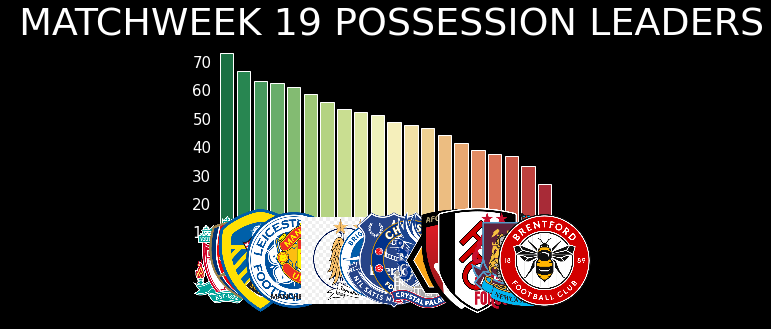

In [13]:
# first I want to try and visualize the possession statistics for each time in the prem over this season. 
# I want to see which teams hold the ball versus which teams prefer to play quickly. I predict City or Liverpool will be at the top and 
# Brentford will be at the bottom since they are a counter attacking team. 
# I will start with last week, Matchweek 19 (at the time of doing this) to practice with the dataset and to start to visualize


# premlogos --> stored as list
import glob
from IPython.display import Image
premlogos = []
names = []
paths = []

for i in glob.glob("/kaggle/input/premlogos/*"):
    paths.append(i)
    premlogos.append(Image(i))
    names.append(i.split("/")[4].split(".")[0])
logos = pd.DataFrame([premlogos, names, paths])
logos.columns = logos.iloc[1]
logos.drop(labels = 1, axis = 0, inplace = True)
logos.rename(columns={'Wolverhampton Wolves':'Wolverhampton Wanderers'}, inplace=True)

df = df_joined
last_wk = df[df['matchweek'] == 'Matchweek 19']
last_wk.drop(186, inplace = True)
last_wk.columns
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
a = last_wk['team1_name']
b = last_wk['team2_name']
premnames = pd.concat([a,b], ignore_index = True).tolist()

import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import difflib as difflib
a = last_wk[['team1_name','team1_possession_%']].join(last_wk[['team2_name','team2_possession_%']])
b = pd.DataFrame(last_wk[['team1_name','team1_possession_%']])
c = pd.DataFrame(last_wk[['team2_name','team2_possession_%']])
c = c.rename(columns={"team2_name": "team1_name", "team2_possession_%": "team1_possession_%"})
tabl = pd.concat([b, c], ignore_index = True).sort_values(by = 'team1_possession_%', ascending = False)
tabl.reset_index(drop=True, inplace=True)
tabl['team1_possession_%'] = tabl['team1_possession_%'].apply(lambda x: float(x))

fig, ax = plt.subplots()
#fig = plt.figure(figsize=(10,30))
sns.set(rc={'figure.figsize':(35, 15)})
ax.set_facecolor('black')
fig.set_facecolor('black')
sns.barplot(x = tabl['team1_name'], y = tabl['team1_possession_%'], palette = 'RdYlGn_r', ), 
plt.title(" MATCHWEEK 19 POSSESSION LEADERS", fontsize = 38, color = 'white')
plt.xticks(rotation=67.5, fontsize = 0), plt.xlabel(" "), plt.ylabel(" "), plt.yticks(fontsize = 15, color = 'white')

#sns.set(font_scale = 100)
def pathfinder(team):
    return logos.iloc[1][team]
def get_team(name):
    path = pathfinder(name) 
    im = plt.imread(path)
    return im
def offset_image(coord, name, ax):
    img = get_team(name)
    im = OffsetImage(img, zoom=0.24)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., 0.), frameon=False, xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)
for i, c in enumerate(tabl['team1_name']):
    offset_image(i, c, ax)
plt.show()

In [14]:
df = df[df.matchweek != "Matchweek 21"]

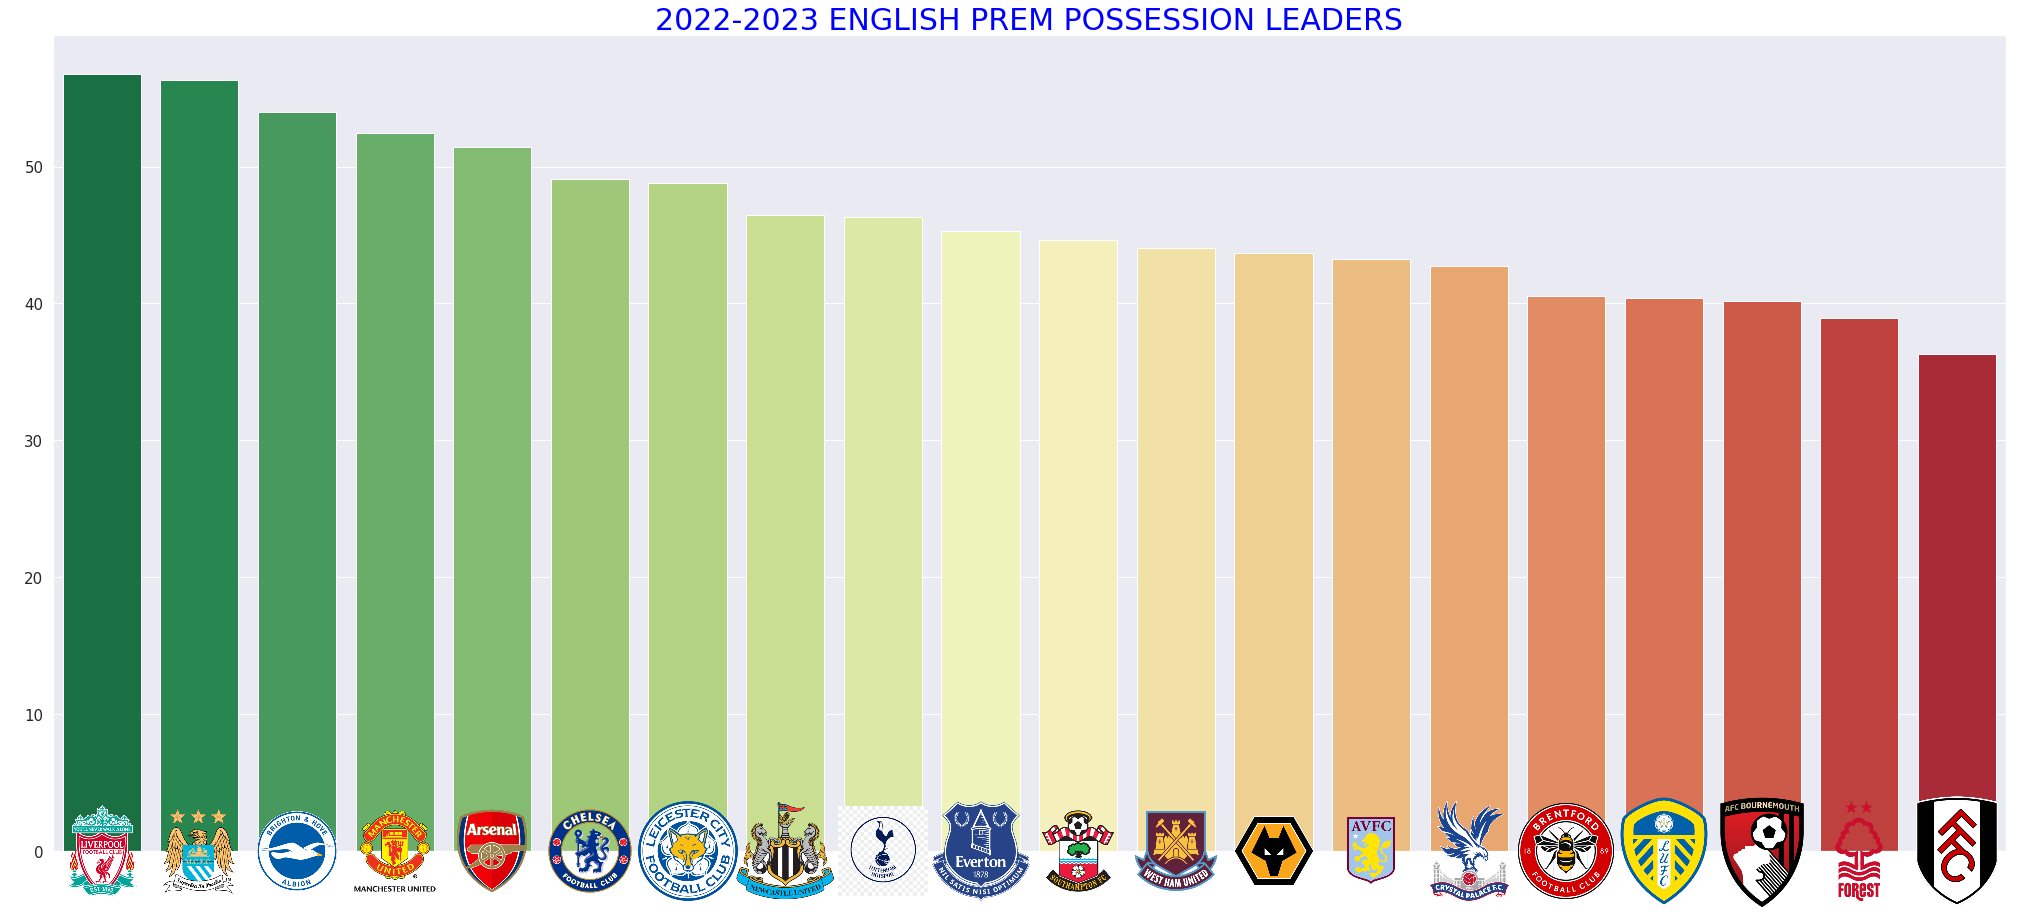

In [15]:
#df = df.drop(186)
a = df[['matchweek', 'team1_name', 'team1_possession_%']]
b = df[['matchweek', 'team2_name', 'team2_possession_%']]
b = b.rename(columns={"team2_name": "team1_name", "team2_possession_%": "team1_possession_%"})
posdf = pd.concat([a,b])
posdf.drop(8, inplace = True)
posdf = posdf.rename(columns={"team1_possession_%": "possession"})
#posdf.drop(8, inplace = True)

posdf = posdf[pd.to_numeric(posdf['possession'], errors='coerce').notnull()]
posdf['possession'] = posdf['possession'].apply(lambda x: float(x))
store = posdf['team1_name'].value_counts()
pos23 = posdf.groupby('team1_name')['possession'].sum()/store
pos23 = pos23.sort_values(ascending = False)
###
littledf = pd.DataFrame(index = pos23.index) 
pos23 = np.array(pos23)
littledf['Possession'] = pos23

#######

fig, ax = plt.subplots()
#fig = plt.figure(figsize=(10,30))
sns.set(rc={'figure.figsize':(35, 15)})
sns.barplot(x = littledf.index, y = littledf['Possession'].sort_values(ascending = False), palette = 'RdYlGn_r'),
font1 = {'family':'fantasy','color':'blue','size':50}
plt.title("2022-2023 ENGLISH PREM POSSESSION LEADERS", fontsize = 30, fontdict = font1)
plt.xticks(rotation=67.5, fontsize = 0), plt.xlabel(" "), plt.ylabel(" "), plt.yticks(fontsize = 15)

#sns.set(font_scale = 100)
def pathfinder(team):
    return logos.iloc[1][team]
def get_team(name):
    path = pathfinder(name) 
    im = plt.imread(path)
    return im
def offset_image(coord, name, ax):
    img = get_team(name)
    im = OffsetImage(img, zoom=0.25)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., 0.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)
for i, c in enumerate(littledf.index):
    offset_image(i, c, ax)

In [16]:
#possession vs points scatterplot
import re
#winners and losers
littledf = pd.DataFrame(index = littledf.index)
littledf['Points'] = 0

gamesdb = pd.DataFrame()
#natural language processing
df['score'] = df['event'].apply(lambda x: str(x).split("Second Half")[0])
df['score'] = df['score'].apply(lambda x: str(x).split(", ")[1:3])
df['score'] = df['score'].apply(lambda x: str(x).split(", ")[0:2])

#df['score'] = df['score'].apply(lambda x: str(x).split(" "))
gamesdb['team1'] = df['score'].apply(lambda y: y[0][2:])
gamesdb['team2'] = df['score'].apply(lambda y: y[1])
gamesdb['score'] = gamesdb['team1'] + gamesdb['team2']

gamesdb['score'] = gamesdb['score'].apply(lambda string: re.findall(r'\d+', string) )
gamesdb['team1'] = gamesdb['team1'].apply(lambda string: " ".join(re.findall("[a-zA-Z]+", string)))
gamesdb['team2'] = gamesdb['team2'].apply(lambda string: " ".join(re.findall("[a-zA-Z]+", string))) 
gamesdb['results'] = 0

def teamToIndex(team):
    i = 0
    while i < len(littledf.index):
        if(littledf.index[i] == team):
            return i 
        i+=1
def compare(box):
    if(box[0] > box[1]):
        return "Team 1 Win"
    if(box[0] == box[1]):
        return "Tie"
    if(box[0] < box[1]):
        return "Team 2 Win"
    
def pointsAllocator(team1, team2, result):
    team1 = teamToIndex(team1)
    team2 = teamToIndex(team2)
    
    if(result == "Team 1 Win"):
        littledf['Points'][team1] = littledf['Points'][team1] + 3
    elif(result == "Team 2 Win"):
        littledf['Points'][team2] = littledf['Points'][team2] + 3
    elif(result == "Tie"):
        littledf['Points'][team1] =  littledf['Points'][team1] + 1
        littledf['Points'][team2] = littledf['Points'][team2] + 1
        
for i in range(0,len(gamesdb)):
    gamesdb['results'][i] = compare(gamesdb.iloc[i]['score'])
    pointsAllocator(gamesdb.iloc[i]['team1'], gamesdb.iloc[i]['team2'], gamesdb.iloc[i]['results'])

rdf = pd.DataFrame(index = littledf.index)
rdf['Points'] = littledf['Points']
rdf['Possession'] = pos23

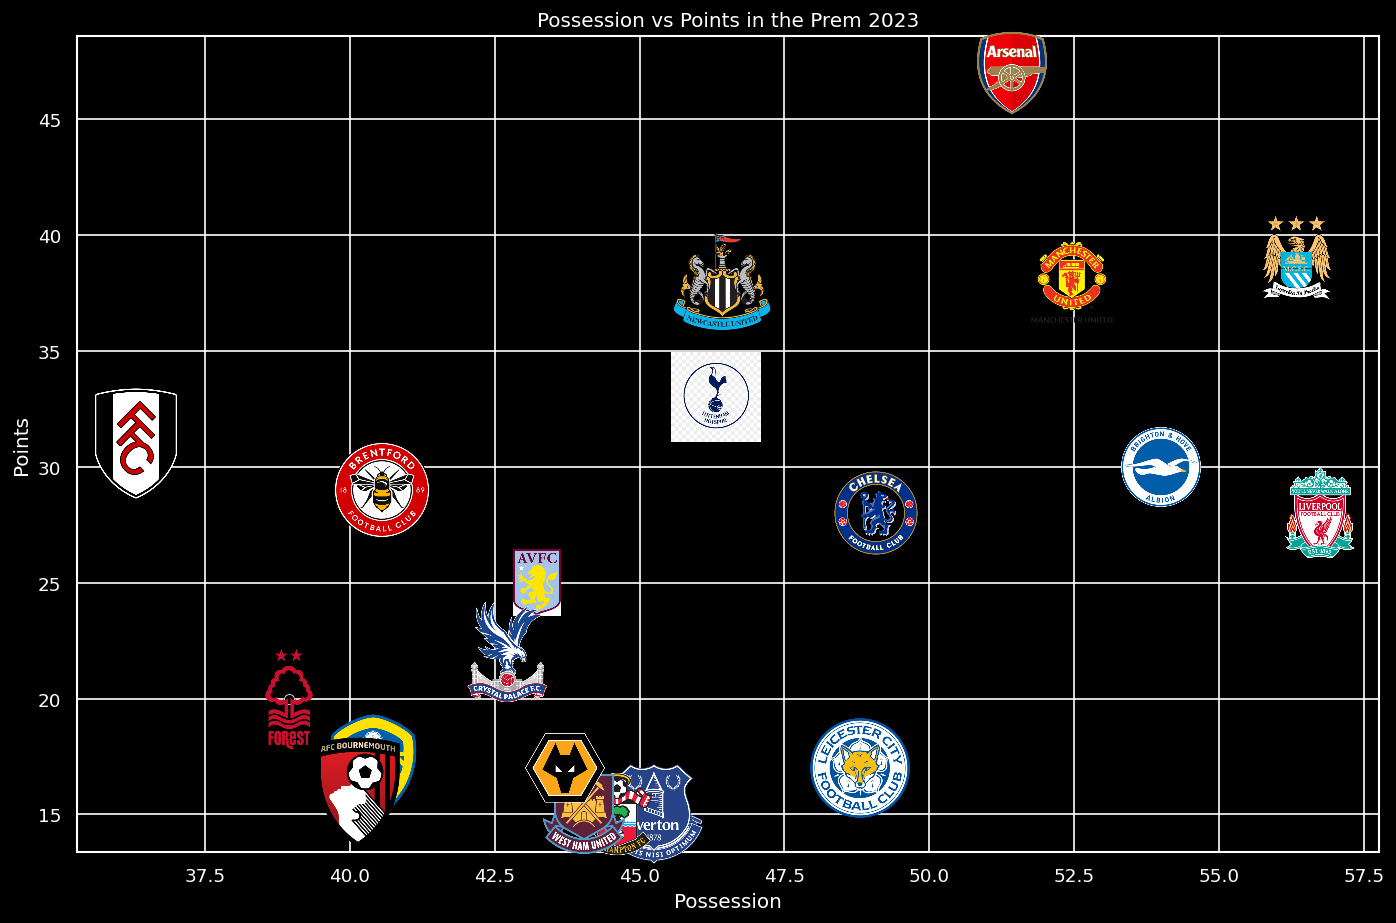

In [17]:
fig, ax = plt.subplots(figsize=(14,9), dpi=120)
ax.scatter(rdf['Possession'], rdf['Points'], color = 'black')
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.15, alpha = 1)

sns.scatterplot(rdf['Possession'], rdf['Points'], color='black')
ax.set_facecolor('black')
fig.set_facecolor('black')

for index, row in rdf.iterrows():
    ab = AnnotationBbox(getImage(logos.iloc[1][index]), (row['Possession'], row['Points']), frameon=False)
    ax.add_artist(ab)
plt.title("Possession vs Points in the Prem 2023", color = 'white')
plt.xticks(color = 'white'), plt.xlabel(xlabel = "Possession", color = 'white'), plt.ylabel(ylabel = "Points", color = 'white'), plt.yticks(color = 'white')
plt.show()

In [18]:
rdf['Goals'] = 0

In [19]:
# next graph
# shooting efficiency graph
goals_scored = pd.DataFrame()
rdf = pd.DataFrame(rdf)

def goalsAllocator(team1, team2, goals):
    team1 = teamToIndex(team1)
    team2 = teamToIndex(team2)
    
    g0 = float(goals[0])
    g1 = float(goals[1])
    
    rdf['Goals'][team1] = rdf['Goals'][team1] + g0    
    rdf['Goals'][team2] = rdf['Goals'][team2] + g1
    
for i in range(0,len(gamesdb)):
    goalsAllocator(gamesdb.iloc[i]['team1'], gamesdb.iloc[i]['team2'], gamesdb.iloc[i]['score'])

In [20]:
#df = df.drop(186)
a = df[['matchweek', 'team1_name', 'team1_shots']]
b = df[['matchweek', 'team2_name', 'team2_shots']]
b = b.rename(columns={"team2_name": "team1_name", "team2_shots": "team1_shots"})
posdf = pd.concat([a,b])
posdf.drop(186, inplace = True)

posdf = posdf.rename(columns={"team1_shots": "shots"})
#posdf.drop(8, inplace = True)

posdf = posdf[pd.to_numeric(posdf['shots'], errors='coerce').notnull()]
posdf['shots'] = posdf['shots'].apply(lambda x: float(x))
store = posdf['team1_name'].value_counts()

#for some reason I noticed that many of the shot_count values were well above 500, most likely being mixed up with another stat, 
posdf = posdf[posdf.shots < 35]
posdf = posdf.groupby('team1_name').sum()
posdf.sort_values(by = 'shots')
posdf['Goals'] = rdf['Goals']
posdf['shootingeff'] = posdf['Goals']/ posdf['shots']
series = posdf.sort_values("shootingeff", ascending = False)

In [21]:
series

,shots,Goals,shootingeff
team1_name,,,
Manchester City,259.0,50,0.193050
Brentford,173.0,32,0.184971
Fulham,181.0,32,0.176796
Leicester City,154.0,26,0.168831
Arsenal,252.0,42,0.166667
Tottenham Hotspur,238.0,39,0.163866
Leeds United,161.0,26,0.161491
Brighton and Hove Albion,217.0,35,0.161290
Liverpool,234.0,34,0.145299


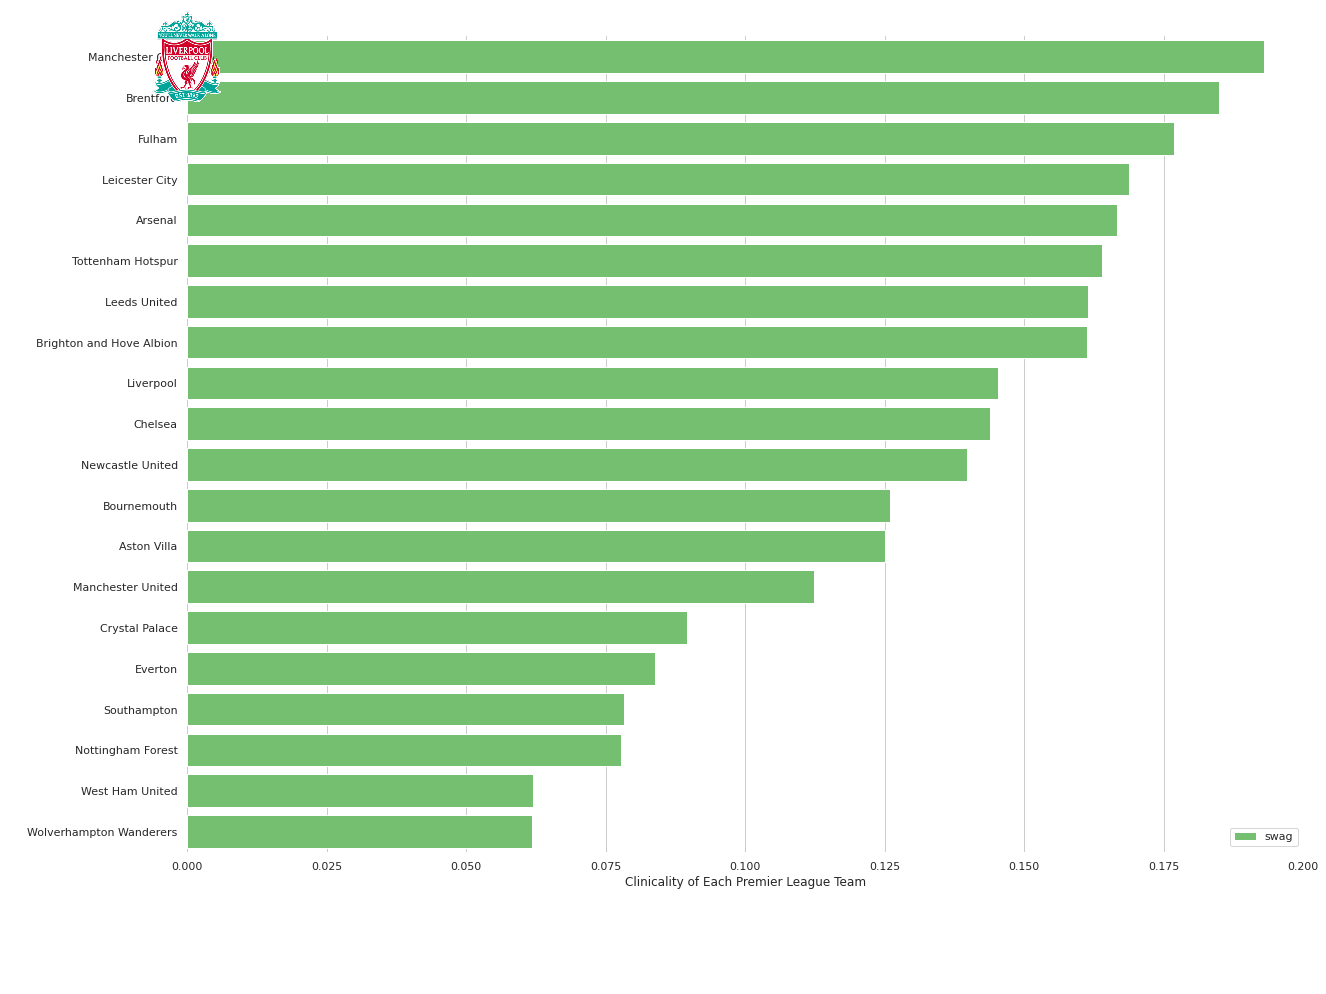

In [22]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 15))

# Load the example car crash dataset
series

# Plot the total crashes
sns.set_color_codes("pastel")


# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x='shootingeff', y=series.index, data=series,
            label="swag", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 0.2), ylabel="",
       xlabel="Clinicality of Each Premier League Team")
sns.despine(left=True, bottom=True)

def pathfinder(team):
    return logos.iloc[1][team]
def get_team(name):
    path = pathfinder(name) 
    im = plt.imread(path)
    return im
def offset_image(coord, name, ax):
    img = get_team(name)
    im = OffsetImage(img, zoom=0.25)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., 0.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)
for i, c in enumerate(littledf.index):
    offset_image(i, c, ax)